In [27]:
import cv2 as cv
import pytesseract
import matplotlib.pyplot as plt
from pathlib import PurePath, Path
from constants import *
tesseract_location = PurePath(Path.home()).joinpath(
    "AppData", "Local", "Programs", "Tesseract-OCR", "tesseract.exe"
)
pytesseract.pytesseract.tesseract_cmd = tesseract_location

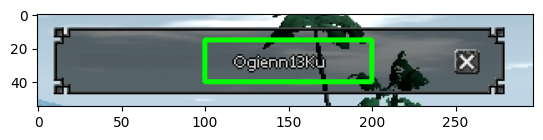

In [28]:
im = cv.imread(str(image))
imcopy = im.copy()
img_gray = cv.cvtColor(imcopy, cv.COLOR_BGR2GRAY)
topleft = (100, 15)
bottomright = (200, 40)
cv.rectangle(im, topleft, bottomright, (0,255,0),2)
plt.imshow(im)


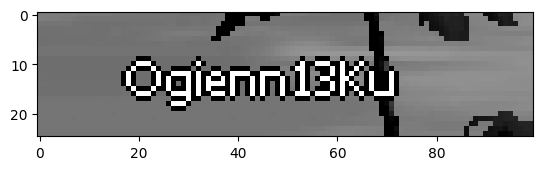

In [29]:

roi = img_gray[topleft[1]: bottomright[1], topleft[0]:bottomright[0]]
plt.imshow(roi, "gray")

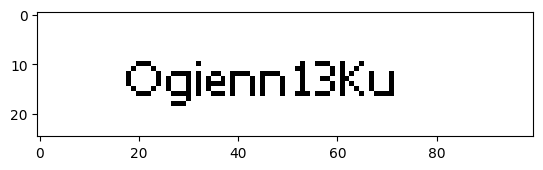

In [30]:
low = 200
max_num = 255
lower_thresh = tuple(low for _ in range(3))
max_thresh = tuple(max_num for _ in range(3))
_, thresh = cv.threshold(roi, low, max_num, cv.THRESH_BINARY_INV)
cv.imwrite(str(APP_DIR.joinpath("img_dark.png")), thresh)
thresh_gray = cv.cvtColor(thresh, cv.COLOR_BGR2RGB)
plt.imshow(thresh_gray)

In [31]:
ocr_result: str = pytesseract.image_to_string(thresh_gray)
print(ocr_result)

Ogienn3Ku

